In [45]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.misc import comb
from scipy.stats import norm
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Problem 1-1

In [2]:
def rayleigh_dist(x, sigma):
    return (x/sigma**2)*np.exp(-x**2/(2*sigma**2))

4102


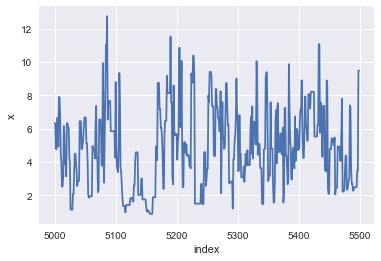

In [3]:
n = 10000
sigma = 4
x = np.zeros(n)
x[0] = np.random.chisquare(df = 1)
k = 0
u = np.random.uniform(0,1,n)

for i in range(1,n):
    xt = x[i-1]
    y = np.random.chisquare(df = xt)
    num = rayleigh_dist(y, sigma)*st.chi2.pdf(xt, df = y)
    denom = rayleigh_dist(xt, sigma)*st.chi2.pdf(y, df = xt)
    if u[i] <= num/denom:
        x[i] = y
    else:
        x[i] = xt
        k = k+1
        
print(k)

index = np.arange(5000,5500)
y1 = x[5000:5500]

plt.xlabel("index")
plt.ylabel("x")
plt.plot(index, y1)
plt.show()

## Problem 1-2

[[ 0.          2.        ]
 [-1.87714527  1.55979627]
 [-1.16746195  1.47227965]
 ...
 [ 0.01717541  1.1281446 ]
 [-1.02422027  2.15889118]
 [-1.24092765  1.65838041]]


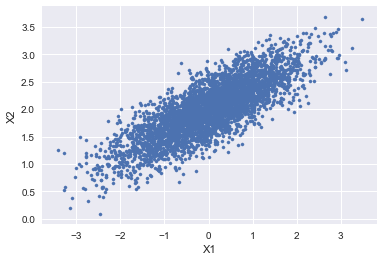

C:\Users\shash\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


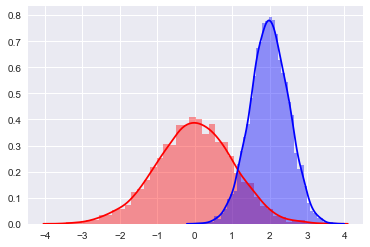

In [4]:
N = 5000
burn = 1000
X = np.zeros((N,2))

rho = 0.8
mu1, mu2 = 0, 2
sigma1, sigma2 = 1, 0.5

s1 = np.sqrt(1-rho**2)*sigma1
s2 = np.sqrt(1-rho**2)*sigma2

#Generating chain
X[0,:] = mu1, mu2
for i in range(1, N):
    x2 = X[i-1][1]
    m1 = mu1 + rho*(x2 - mu2)*(sigma1/sigma2)
    X[i,0] = np.random.normal(loc = m1, scale = s1, size = 1)
    x1 = X[i, 0]
    m2 = mu2 + rho*(x1 - mu1)*(sigma2/sigma1)
    X[i,1] = np.random.normal(loc = m2, scale = s2, size = 1)
    
print(X)

b  = burn + 1
x = X[b:N,:]

s = 10
plt.scatter(x[:,0],x[:,1],s = s)
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

sns.distplot(x[:,0], color = 'r')
sns.distplot(x[:,1], color = 'b')
plt.show()

## Problem 2-1

In [5]:
def prob_vector(theta):
    return (np.r_[2+theta, (1-theta), (1-theta), theta]/4)

In [6]:
def prob_ratio(n, d):
    return(np.prod(prob_vector(n)**sizes / prob_vector(d)**sizes))

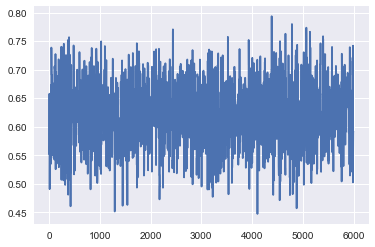

C:\Users\shash\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


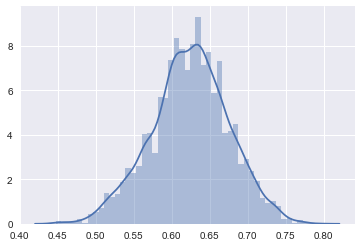

In [7]:
sizes = np.r_[125, 18, 20, 34]

m = 10000
burn = 2000
temp_burn = []
for i in range(burn+1, m+1):
    temp_burn.append(i)
    
x_rw = np.zeros(m)
k_rw = 0
u = np.random.uniform(size = m)
v = np.random.uniform(low = -0.25, high = 0.25, size = m)

x_rw[0] = v[0]
for i in range(1, m):
    xt = x_rw[i-1]
    y = xt + v[i]
    r = min(prob_ratio(y, xt), 1)
    if u[i] <= r:
        x_rw[i] = y
    else:
        k_rw = k_rw + 1
        x_rw[i] = xt
        
x = []
for i in range(temp_burn[0], len(temp_burn)):
    x.append(x_rw[i])
    
plt.plot(x)
plt.show()

sns.distplot(x, hist = True, kde = True)
plt.show()

## Problem 2-2

In [36]:
def sampler(data, samples, mu_init, sigma, proposal_width, 
            mu_prior_mu, mu_prior_sd):
    mu_curr = mu_init
    posterior = [mu_curr]
    for i in range(samples):
        mu_prop = norm(mu_curr, proposal_width).rvs()

        likelihood_curr = norm(mu_curr, sigma).pdf(data).prod()
        likelihood_prop = norm(mu_prop, sigma).pdf(data).prod()
            
        prior_curr = norm(mu_prior_mu, mu_prior_sd).pdf(mu_curr)
        prior_prop = norm(mu_prior_mu, mu_prior_sd).pdf(mu_prop)
        
        p_curr = likelihood_curr * prior_curr
        p_prop = likelihood_prop * prior_prop
        
        c = np.min((1,p_prop / p_curr))
        
        accept = np.random.rand() <= c
                
        if accept:
            mu_curr = mu_prop
        
        posterior.append(mu_curr)
        
    return np.array(posterior)


In [40]:
np.random.seed(282629734)
data = norm(10,3).rvs(10)
sigma = 0.2       
mu_prior = 8
sigma_prior = 1.5  

In [43]:
chain1 = sampler(data,samples=15000,mu_init=3,sigma=sigma,proposal_width=2,
                mu_prior_mu=mu_prior,mu_prior_sd = sigma_prior)
chain2 = sampler(data,samples=15000,mu_init=3,sigma=sigma,proposal_width=2,
                mu_prior_mu=mu_prior,mu_prior_sd = sigma_prior)

C:\Users\shash\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\shash\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\shash\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in double_scalars


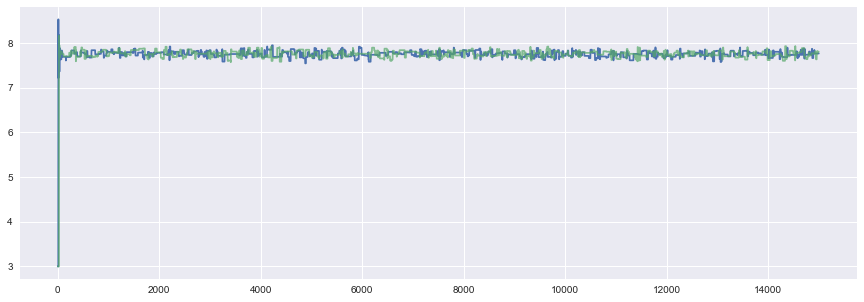

In [44]:
plt.figure(figsize=(15,5))
plt.plot(np.arange(15001),chain1)
plt.plot(np.arange(15001),chain2,alpha=.7)
plt.show()

## Problem 3-1

In [8]:
def df(xx, yy, nn, a, b):
    p1 = comb(nn, xx)
    p2 = (yy**(xx+a-1))
    p3 = ((1-yy)**(nn-xx+b-1))
    return p1 * p2 * p3

C:\Users\shash\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `comb` is deprecated!
Importing `comb` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.comb` instead.
  
C:\Users\shash\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  after removing the cwd from sys.path.
C:\Users\shash\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


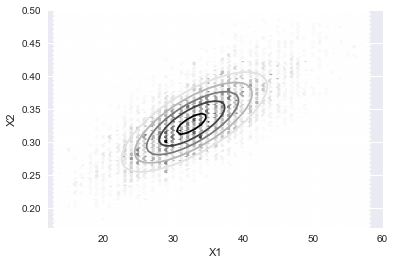

In [9]:
n = 100
a = 30
b = 60

m = 10000
d = 2
x = np.zeros((m,d))
burn = 2000

x[0,] = [60, 0.7]
for i in range(1, m):
    xt = x[i-1,1]
    x[i, 0] = st.binom.rvs(n, xt, size = 1)
    xt = x[i,0]
    x[i,1] = st.beta.rvs(xt+a, n - xt + b, size = 1)
    
x = x[burn:m]   

xx, yy = np.meshgrid(np.arange(201) , np.linspace(0, 1, 200))
z = np.c_[xx.ravel(), yy.ravel()]
Z = np.asarray([df(z[i,0],z[i,1],n,a,b) for i in  range(len(z))])
Z = Z.reshape(xx.shape)

plt.hexbin(x[:6000,0],x[:6000,1])
plt.contour(xx, yy, Z)
plt.xlim(12, 60)
plt.ylim(0.17, 0.5)
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

## Problem 3-2

In [10]:
def GelmanRubin(psi):
    psi = np.asmatrix(psi)
    n = len(psi) #15000
    k = len(psi[0,:]) #4
    
    psi_means = np.zeros(k)
    for i in range(k):
        psi_means[i] = np.mean(psi[:,i])
    B = n*np.var(psi_means)
    
    psi_w = np.zeros(k)
    for i in range(k):
        psi_w[i] = np.var(psi[:,i])
    W = np.mean(psi_w)
    v_hat = (W*(n-1)/n) + (B/n)
    r_hat = v_hat/W
    return r_hat

In [11]:
def normal_chain(sigma, N, X1):
    x = np.zeros(N)
    x[0] = X1
    u = np.random.uniform(low = 0, high = 1, size = N)
    for i in range(1, N):
        xt = x[i-1]
        y = np.random.normal(loc = xt, scale = sigma, size = 1)
        r1 = st.norm.pdf(y, 0, 1) * st.norm.pdf(xt, y, sigma)
        r2 = st.norm.pdf(xt, 0, 1) * st.norm.pdf(y, xt, sigma)
        r = r1/r2
        if u[i] <= r:
            x[i] = y
        else:
            x[i] = xt
    return x

In [12]:
sigma = 0.2
k = 4
n = 15000
b = 1000

x0 = np.r_[-10, -5, 5, 10]

X = np.zeros((n, k))
for i in range(k):
    X[:, i] = normal_chain(sigma, n, x0[i])
    
psi = np.zeros((n, k))
for i in range(k):
    temp = 0
    for j in range(n):
        temp = temp + X[j][i]
        psi[j,i] = temp
        
for i in range(k):
    psi[:,i] = psi[:,i]/np.arange(1,n+1)
    
print("The value of R_hat is: ",GelmanRubin(psi[b+1:,:]))

The value of R_hat is:  0.9999285663261661


## Problem 4-1

In [13]:
def Correlation(x):
    return np.corrcoef(x[:,0],x[:,1])[0][1]
correlation_X = Correlation(X)

In [15]:
def boot(inp_arr, B):
    n = len(inp_arr)
    corr_boot = np.zeros(B)
    for b in range(B):
        i = np.random.choice(n, n)
        bsample = inp_arr[i]
        corr_boot[b] = Correlation(bsample)
    return corr_boot

In [20]:
data = pd.read_csv("C:/Users/shash/Desktop/UCF/Fall 2018/Stat Computing 1/Exam/mtcars.csv")

X = data[['mpg', 'hp']]
X = np.array(X)

correlation_X = Correlation(X)

x = boot(X, 200)

bias_Boot = np.mean(x) - correlation_X
print("Bootstrap bias estimate:",bias_Boot)

se_Boot = np.std(x, ddof = 1)
print("Bootstrap SE estimate:",se_Boot)

Bootstrap bias estimate: -0.012367964418082744
Bootstrap SE estimate: 0.04671403351239438


## Problem 4-2

In [25]:
n = len(X)

mpg = X[:,0]
hp = X[:,1]

theta_jack = np.zeros(n)

for i in range(n):
    idx = np.arange(n)
    theta_jack[i] = np.corrcoef(mpg[idx!=i],hp[idx!=i])[0][1]

bias_Jack = (n-1)*(np.mean(theta_jack)- correlation_X)
SE_Jack = np.sqrt((n-1)*np.mean((theta_jack - np.mean(theta_jack))**2))

print("Jackknife estimate of standard error of correlation is:", SEJack)
print("Jackknife estimate of the bias of correlation is: ", biasJack)

Jackknife estimate of standard error of correlation is: 0.05509363247760185
Jackknife estimate of the bias of correlation is:  -0.0131315719134949


## Problem 5

In [27]:
def bootstrap_T_interval(B, C, inp_arr):
    t_rep = np.zeros(B)
    n = len(inp_arr)
    for b in range(B):
        i = np.random.choice(n,n)
        bsample = inp_arr[i]
        corr_B = Correlation(bsample)
        x = boot(bsample, C)
        SE_B = np.std(x, ddof = 1)
        t_rep[b] = (corr_B - Correlation(inp_arr))/SE_B
    return t_rep

In [29]:
t = bootstrap_T_interval(500, 200, X)
t = pd.Series(t)

alpha = [0.025, 0.975]
tq = t.quantile(alpha)

high = (correlation_X - tq[0.025]*se_Boot)
low = (correlation_X - tq[0.975]*se_Boot)

print("95% t CI:", (low,high))

95% t CI: (-0.8503717229531365, -0.6142561683527411)
